In [1]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam  # Import the optimizer

# Define directories
train_dir = 'dd_dataset/train'
val_dir = 'dd_dataset/valid'
test_dir = 'dd_dataset/test'

# Image dimensions
img_width, img_height = 500, 500
input_shape = (img_width, img_height, 3)

# Hyperparameters
epochs = 50
batch_size = 16

# Data augmentation for the training set
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

# Rescaling for the validation and test sets
val_test_datagen = ImageDataGenerator(rescale=1./255)

# Load the data
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(img_width, img_height),
                                                    batch_size=batch_size,
                                                    class_mode='binary')

val_generator = val_test_datagen.flow_from_directory(val_dir,
                                                      target_size=(img_width, img_height),
                                                      batch_size=batch_size,
                                                      class_mode='binary')

test_generator = val_test_datagen.flow_from_directory(test_dir,
                                                       target_size=(img_width, img_height),
                                                       batch_size=batch_size,
                                                       class_mode='binary')

# Build the CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
opt = Adam(learning_rate=0.0005)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])


C:\Users\HP\anaconda3\envs\env_myenv38\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Found 1056 images belonging to 2 classes.
Found 103 images belonging to 2 classes.
Found 71 images belonging to 2 classes.


In [2]:
print(train_generator.samples)
print(val_generator.samples)
print(test_generator.samples)

1056
103
71


In [3]:
# Train the model
history = model.fit(train_generator,
                    steps_per_epoch=train_generator.samples // batch_size,
                    epochs=epochs,
                    validation_data=val_generator,
                    validation_steps=val_generator.samples // batch_size)


Epoch 1/50
66/66 [==============================] - 228s 3s/step - loss: 0.0115 - accuracy: 0.9886 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/50
66/66 [==============================] - 227s 3s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/50
66/66 [==============================] - 227s 3s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/50
66/66 [==============================] - 223s 3s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/50
66/66 [==============================] - 223s 3s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/50
66/66 [==============================] - 223s 3s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/50
66/66 [==============================] - 226s 3s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_l

In [4]:
# Save the model
model.save('drowsiness_detection_model.h51')

INFO:tensorflow:Assets written to: drowsiness_detection_model.h51\assets


INFO:tensorflow:Assets written to: drowsiness_detection_model.h51\assets


In [5]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator, steps=test_generator.samples // batch_size)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

4/4 [==============================] - 4s 724ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Test Accuracy: 100.00%


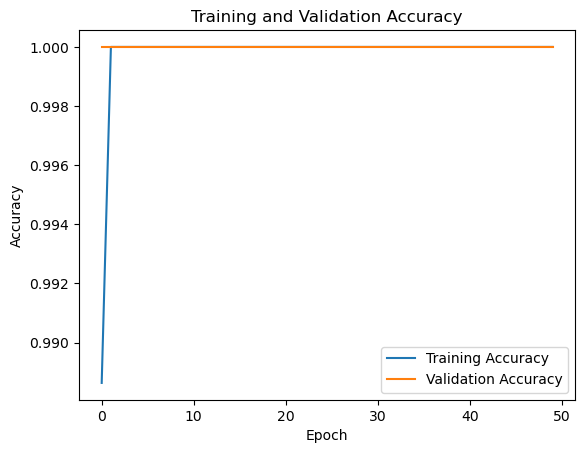

In [6]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy over epochs
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


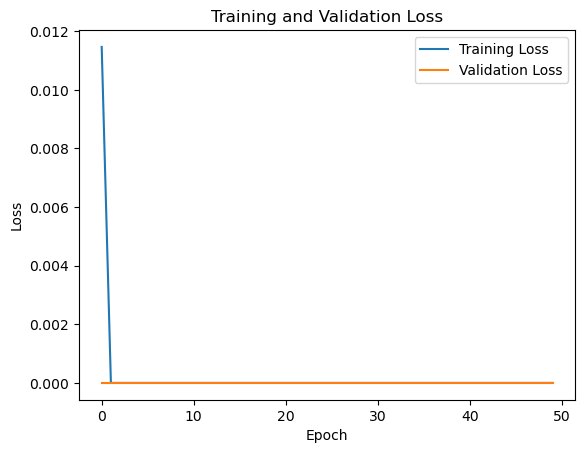

In [7]:
# Plot training and validation loss over epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


5/5 [==============================] - 3s 569ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Test Accuracy: 100.00%
5/5 [==============================] - 3s 567ms/step
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        71

    accuracy                           1.00        71
   macro avg       1.00      1.00      1.00        71
weighted avg       1.00      1.00      1.00        71



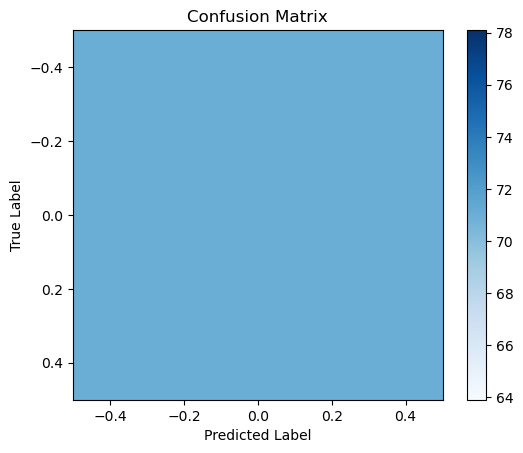

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator, steps=len(test_generator))
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

# Generate predictions on the test set
y_pred_probs = model.predict(test_generator, steps=len(test_generator))

# Define a threshold for classification (adjust as needed)
threshold = 0.5
y_pred_binary = (y_pred_probs > threshold).astype(int)

# Generate and print a classification report with zero_division parameter
print("Classification Report:")
print(classification_report(test_generator.classes, y_pred_binary, zero_division=1))

# Generate and plot a confusion matrix
conf_mat = confusion_matrix(test_generator.classes, y_pred_binary)
plt.imshow(conf_mat, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [9]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
import pygame

# Load the trained model
model = load_model('drowsiness_detection_model.h5')

# Initialize Pygame for sound
pygame.init()
pygame.mixer.init()
alert_sound = pygame.mixer.Sound('sound.wav')  

# Open the camera (0 corresponds to the default camera)
cap = cv2.VideoCapture(0)

# Set the frame dimensions (adjust as needed)
frame_width = 640
frame_height = 480
cap.set(3, frame_width)
cap.set(4, frame_height)

while True:
    # Capture frame-by-frame
    ret, frame = cap.read()

    # Preprocess the frame
    # (resize, normalize, and any other required preprocessing steps)
    processed_frame = cv2.resize(frame, (350, 350))  # adjust the size accordingly
    processed_frame = processed_frame / 255.0  # normalize

    # Expand dimensions to match the input shape expected by the model
    processed_frame = np.expand_dims(processed_frame, axis=0)

    # Make predictions
    prediction = model.predict(processed_frame)

    # Postprocess the prediction set a threshold
    threshold = 0.1  # adjust as needed
    result = "Drowsy" if prediction > threshold else "Not Drowsy"

    # Display the frame with the prediction
    cv2.putText(frame, result, (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)
    cv2.imshow('Drowsiness Detection', frame)

    # Play sound alert when drowsy
    if prediction > threshold:
        alert_sound.play()

    # Break the loop if 'q' key is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the camera, close Pygame, and close all OpenCV windows
cap.release()
pygame.mixer.quit()
cv2.destroyAllWindows()


pygame 2.1.2 (SDL 2.0.18, Python 3.10.9)
Hello from the pygame community. https://www.pygame.org/contribute.html
1/1 [==============================] - 0s 72ms/step
